In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/elektrik_veri_hashed.xlsx"
xls = pd.ExcelFile(file_path)

df_tahsilat = pd.read_excel(xls, 'Tahsilat')
df_tahsilat_1 = pd.read_excel(xls, 'Tahsilat 1')
df_tahakkuk = pd.read_excel(xls, 'Tahakkuk') # Hamamözü
df_tahakkuk_1 = pd.read_excel(xls, 'Tahakkuk 1') # Gümüşhacıköy
df_tahakkuk_2 = pd.read_excel(xls, 'Tahakkuk 2') # Göynücek

/tmp/ipython-input-414653167.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tahakkuk, x='hesap_sinifi', ax=axes[0], palette='magma',
/tmp/ipython-input-414653167.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tahakkuk_1, x='hesap_sinifi', ax=axes[1], palette='magma',
/tmp/ipython-input-414653167.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tahakkuk_2, x='hesap_sinifi', ax=axes[2], palette='magma',


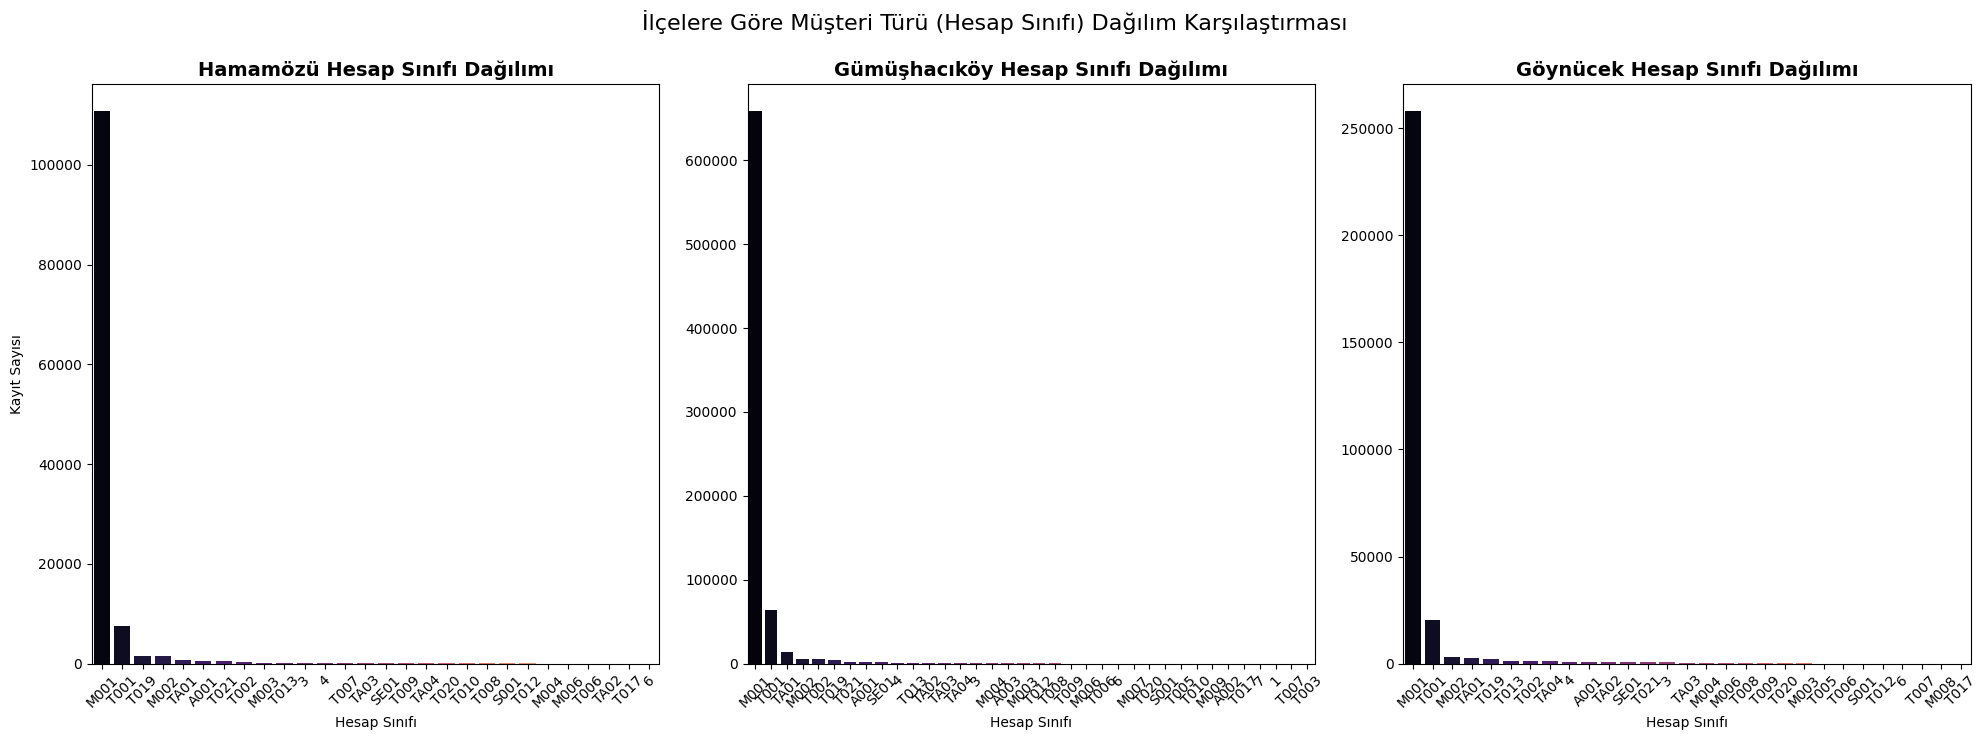

In [ ]:
plt.style.use('seaborn-v0_8-muted')
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)

# 1. Hamamözü Dağılımı (Tahakkuk)
sns.countplot(data=df_tahakkuk, x='hesap_sinifi', ax=axes[0], palette='magma',
              order=df_tahakkuk['hesap_sinifi'].value_counts().index)
axes[0].set_title('Hamamözü Hesap Sınıfı Dağılımı', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hesap Sınıfı')
axes[0].set_ylabel('Kayıt Sayısı')
axes[0].tick_params(axis='x', rotation=45)

# 2. Gümüşhacıköy Dağılımı (Tahakkuk 1)
sns.countplot(data=df_tahakkuk_1, x='hesap_sinifi', ax=axes[1], palette='magma',
              order=df_tahakkuk_1['hesap_sinifi'].value_counts().index)
axes[1].set_title('Gümüşhacıköy Hesap Sınıfı Dağılımı', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hesap Sınıfı')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

# 3. Göynücek Dağılımı (Tahakkuk 2)
sns.countplot(data=df_tahakkuk_2, x='hesap_sinifi', ax=axes[2], palette='magma',
              order=df_tahakkuk_2['hesap_sinifi'].value_counts().index)
axes[2].set_title('Göynücek Hesap Sınıfı Dağılımı', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hesap Sınıfı')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=45)

# Grafiklerin birbirine girmemesi için düzenleme
plt.tight_layout()
plt.suptitle('İlçelere Göre Müşteri Türü (Hesap Sınıfı) Dağılım Karşılaştırması', fontsize=16, y=1.05)
plt.show()

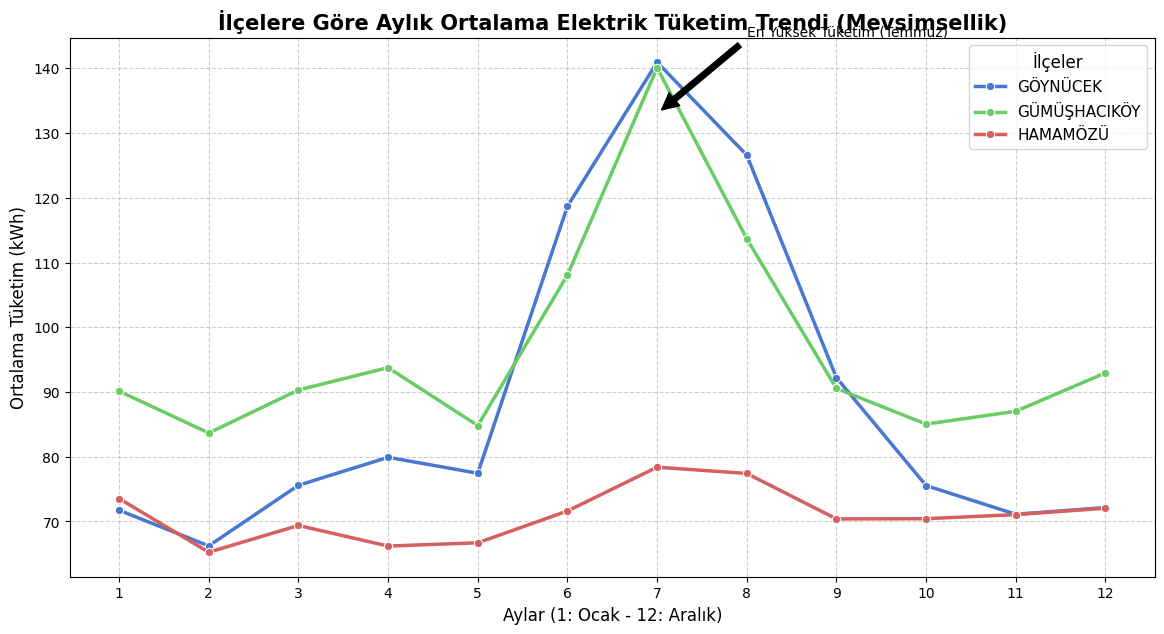

In [ ]:
df_tahakkuk_toplam = pd.concat([df_tahakkuk, df_tahakkuk_1, df_tahakkuk_2], ignore_index=True)

# 1. Tarih Dönüşümü ve Ay Bilgisinin Çıkarılması
df_tahakkuk_toplam['mali_yil_donem'] = pd.to_datetime(df_tahakkuk_toplam['mali_yil_donem'])
df_tahakkuk_toplam['ay'] = df_tahakkuk_toplam['mali_yil_donem'].dt.month

# 2. İlçelere Göre Aylık Ortalama Tüketimin Hesaplanması
# İlçe ve ay bazında kwh ortalamalarını alıyoruz
mevsimsel_trend = df_tahakkuk_toplam.groupby(['ilce', 'ay'])['kwh'].mean().reset_index()

# 3. Çizgi Grafiği ile Görselleştirme
plt.figure(figsize=(14, 7))
sns.lineplot(data=mevsimsel_trend, x='ay', y='kwh', hue='ilce', marker='o', linewidth=2.5)

# Grafik Detayları
plt.title('İlçelere Göre Aylık Ortalama Elektrik Tüketim Trendi (Mevsimsellik)', fontsize=15, fontweight='bold')
plt.xlabel('Aylar (1: Ocak - 12: Aralık)', fontsize=12)
plt.ylabel('Ortalama Tüketim (kWh)', fontsize=12)
plt.xticks(range(1, 13)) # 1'den 12'ye kadar ayları göster
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='İlçeler', title_fontsize='12', fontsize='11')
plt.annotate('En Yüksek Tüketim (Temmuz)', xy=(7, 133), xytext=(8, 145),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

plt.show()

/tmp/ipython-input-2472364390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ilce_counts.values, y=ilce_counts.index, ax=ax[0], palette='viridis')
/tmp/ipython-input-2472364390.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sube_counts.values, y=sube_counts.index, ax=ax[1], palette='magma')


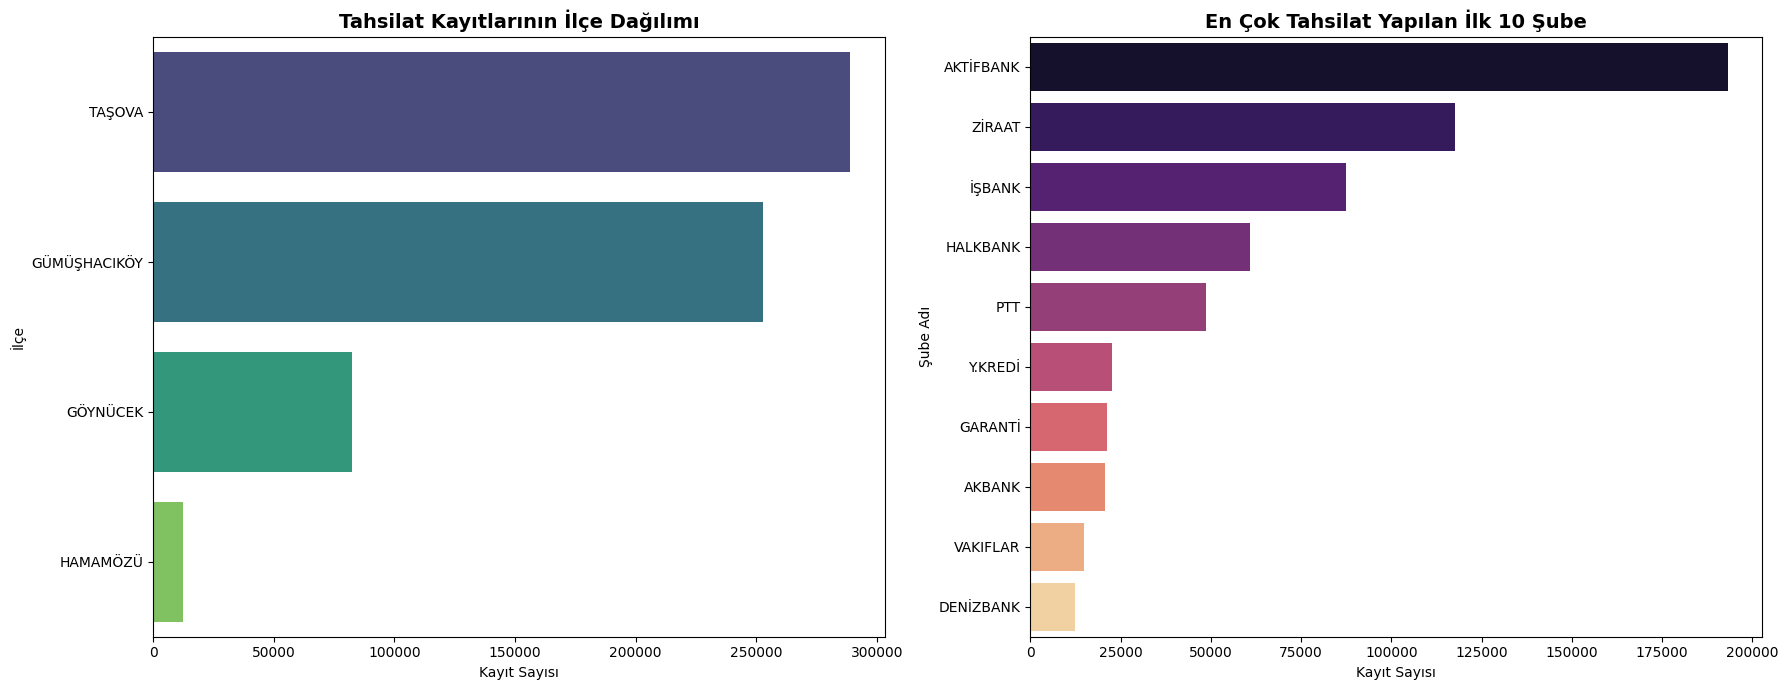

In [ ]:
# Grafik alanı oluşturma
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# 2. İlçe Dağılımı - Sütun Grafiği
ilce_counts = df_tahsilat['İlçe'].value_counts()
sns.barplot(x=ilce_counts.values, y=ilce_counts.index, ax=ax[0], palette='viridis')
ax[0].set_title('Tahsilat Kayıtlarının İlçe Dağılımı', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Kayıt Sayısı')
ax[0].set_ylabel('İlçe')

# 3. Şube Dağılımı - Sütun Grafiği
sube_counts = df_tahsilat['Şube'].value_counts().head(10) # En çok işlem yapılan ilk 10 şube
sns.barplot(x=sube_counts.values, y=sube_counts.index, ax=ax[1], palette='magma')
ax[1].set_title('En Çok Tahsilat Yapılan İlk 10 Şube', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Kayıt Sayısı')
ax[1].set_ylabel('Şube Adı')

plt.tight_layout()
plt.show()

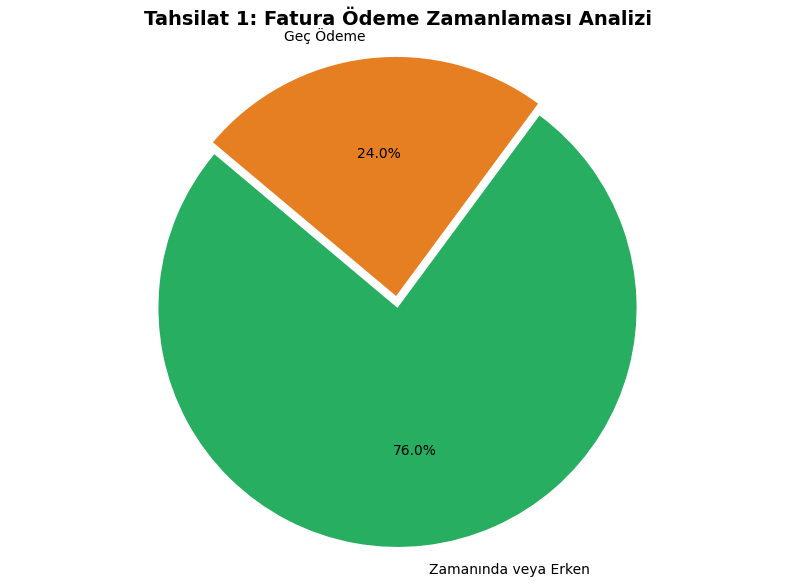

In [ ]:
# 1. Veriyi yükleme (Sadece gerekli sütunlar)
file_path = '/content/elektrik_veri_hashed.xlsx'
zamaninda_sutunlar = ['Son Ödeme Tarihinden Önceki Tahsilat', 'Son Ödeme Tarihindeki Tahsilat']
gecikme_sutunlar = [
    'Son Ödeme (1)', 'Son Ödeme (2)', 'Son Ödeme (3)', 'Son Ödeme (4)', 'Son Ödeme (5)',
    'Son Ödeme (6-10)', 'Son Ödeme (10-20)', 'Son Ödeme (20-30)', 'Son Ödeme (30-60)',
    'Son Ödeme (60-90)', 'Son Ödeme (90-120)', 'Son Ödeme (120-150)',
    'Son Ödeme (150-180)', 'Son Ödeme (180+)'
]

df_tahsilat_1 = pd.read_excel(file_path, sheet_name='Tahsilat 1', usecols=zamaninda_sutunlar + gecikme_sutunlar)

# 2. Sayıları Hesaplama
# Herhangi bir zamanında ödeme sütunu dolu olan kayıtlar
zamaninda_sayisi = df_tahsilat_1[zamaninda_sutunlar].notna().any(axis=1).sum()

# Herhangi bir gecikme sütunu dolu olan kayıtlar
gec_sayisi = df_tahsilat_1[gecikme_sutunlar].notna().any(axis=1).sum()

# 3. Pasta Grafiği Oluşturma
labels = ['Zamanında veya Erken', 'Geç Ödeme']
sizes = [zamaninda_sayisi, gec_sayisi]
colors = ['#27ae60', '#e67e22'] # Koyu Yeşil ve Turuncu

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))

plt.title('Tahsilat 1: Fatura Ödeme Zamanlaması Analizi', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()


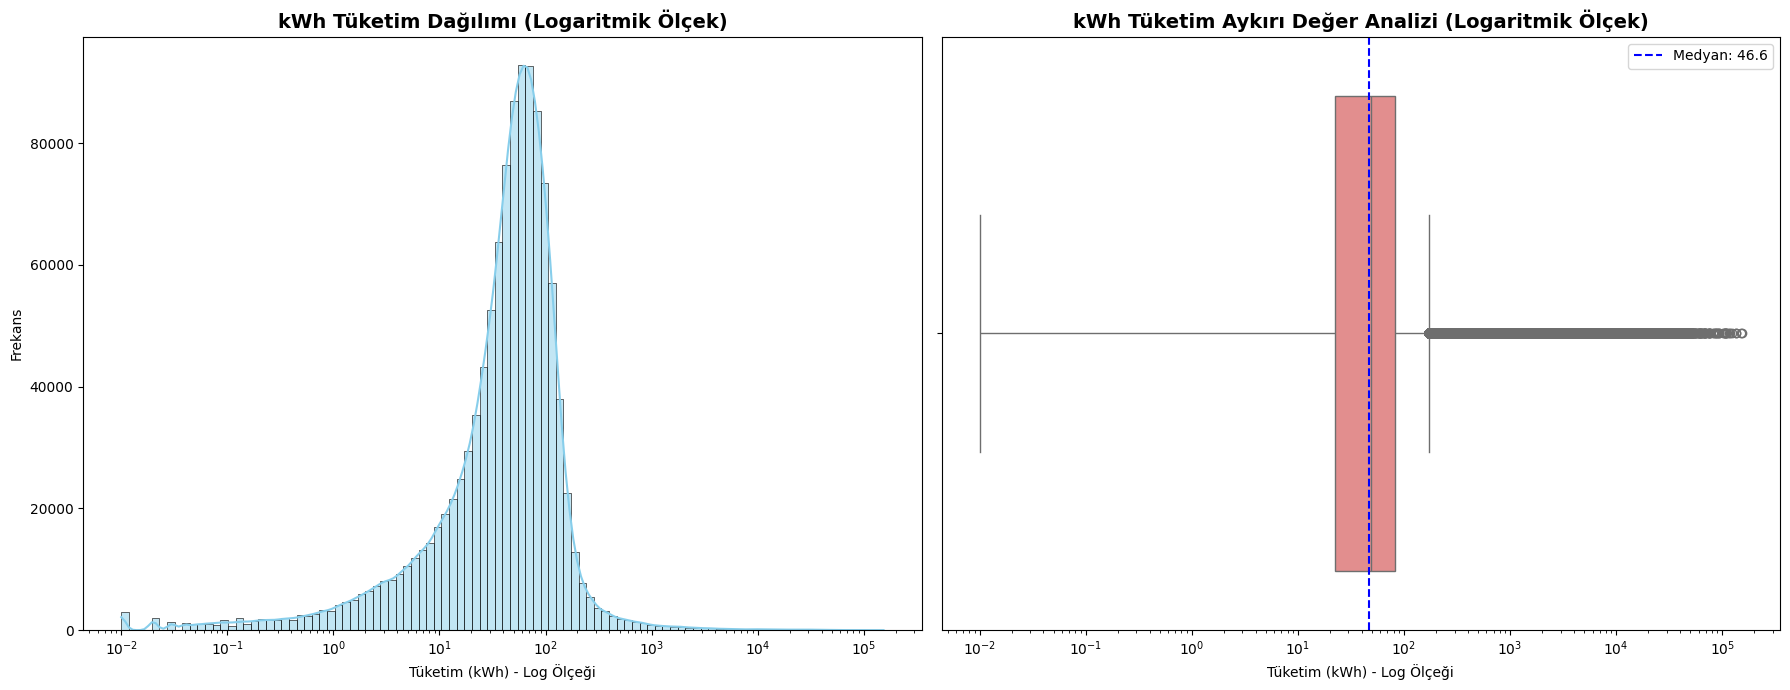

Not: Grafik için 55528 adet negatif veya sıfır değer filtrelenmiştir.
Maksimum Değer: 153576 kWh
Minimum Değer: -25371 kWh


In [ ]:
# 1. Veriyi hazırlama: Logaritmik ölçek için sadece pozitif değerleri alıyoruz
df_pozitif = df_tahakkuk_toplam[df_tahakkuk_toplam['kwh'] > 0]

# 2. Grafik alanını oluşturma
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# --- Histogram (Logaritmik X Ekseni) ---
sns.histplot(data=df_pozitif, x='kwh', bins=100, ax=ax[0], color='skyblue', kde=True, log_scale=True)
ax[0].set_title('kWh Tüketim Dağılımı (Logaritmik Ölçek)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Tüketim (kWh) - Log Ölçeği')
ax[0].set_ylabel('Frekans')

# --- Box Plot (Logaritmik X Ekseni) ---
sns.boxplot(x=df_pozitif['kwh'], ax=ax[1], color='lightcoral')
ax[1].set_xscale('log') # X eksenini logaritmik yapıyoruz
ax[1].set_title('kWh Tüketim Aykırı Değer Analizi (Logaritmik Ölçek)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Tüketim (kWh) - Log Ölçeği')

# 3. İstatistiksel Bilgileri Ekleme
medyan = df_tahakkuk_toplam['kwh'].median()
ax[1].axvline(medyan, color='blue', linestyle='--', label=f'Medyan: {medyan:.1f}')
ax[1].legend()

plt.tight_layout()
plt.show()

# Veri setindeki uç değerlerin hatırlatması [cite: 278, 279]
print(f"Not: Grafik için {len(df_tahakkuk_toplam) - len(df_pozitif)} adet negatif veya sıfır değer filtrelenmiştir.")
print(f"Maksimum Değer: {df_tahakkuk_toplam['kwh'].max():.0f} kWh") # 153,576 [cite: 279]
print(f"Minimum Değer: {df_tahakkuk_toplam['kwh'].min():.0f} kWh")  # -25,371 [cite: 278]